# Betting Odds and Win Probabilities: Self Test Solutions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Self Test - 1

Derive the comparable scatter diagram and correlation coefficient for the MLB data (the odds are also in the decimal format).

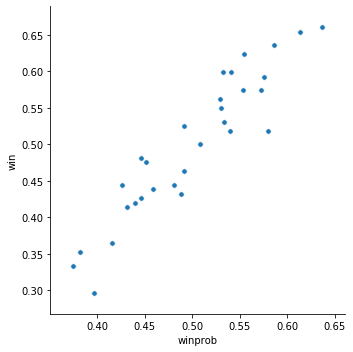

In [2]:
# Self test answer

MLB19 = pd.read_excel("../../Data/Week 2/MLB2019odds.xlsx")
MLB19['winprob']= 1/(MLB19['oddsfor'])/(1/(MLB19['oddsfor'])+ 1/(MLB19['oddsagainst']))
MLBteamprobs=MLB19.groupby('team')[['winprob','win']].mean()
#scatter plot:
sns.relplot(x="winprob", y="win", data = MLBteamprobs, s=30)

In [3]:
# correlation coefficient
np.corrcoef(MLBteamprobs["winprob"], MLBteamprobs['win'])

array([[1.        , 0.93347856],
       [0.93347856, 1.        ]])

## Self Test - 2

Derive the comparable scatter diagram and correlation coefficient for the EPL data. The odds are also in the decimal format. In the EPL teams are awarded three points for a win and one point for a draw.

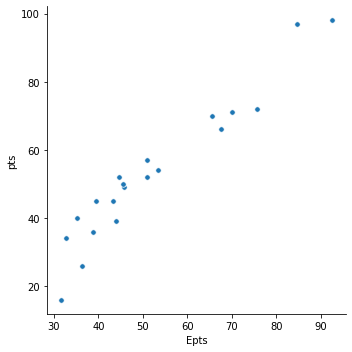

In [4]:
# Self test answer

EPL19 = pd.read_excel("../../Data/Week 2/EPL2018-19odds.xlsx")
EPL19['winprob']= 1/(EPL19['winodds'])/(1/(EPL19['winodds'])+ 1/(EPL19['drawodds'])+ 1/(EPL19['loseodds']))
EPL19['drawprob']= 1/(EPL19['drawodds'])/(1/(EPL19['winodds'])+ 1/(EPL19['drawodds'])+ 1/(EPL19['loseodds']))
EPL19['Epts']= 3*EPL19['winprob']+EPL19['drawprob']
EPLteamprobs=EPL19.groupby('team')[['Epts','pts']].sum()
sns.relplot(x="Epts", y="pts", data = EPLteamprobs, s=30)

In [5]:
# Self test correlation

np.corrcoef(EPLteamprobs["Epts"], EPLteamprobs['pts'])

array([[1.        , 0.96116939],
       [0.96116939, 1.        ]])